In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score
import matplotlib.pyplot as plt

In [2]:
raw_data = pd.read_csv("D:\ML Datasets\Mall_Customers.csv")
raw_data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
# Data Preprocessing
data = raw_data.drop(["CustomerID"], axis=1)
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(data["Genre"])
data["Gender"] = labels
processed_data = data.drop(["Genre"], axis=1)
processed_data

,Age,Annual Income (k$),Spending Score (1-100),Gender
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0
...,...,...,...,...
195,35,120,79,0
196,45,126,28,0
197,32,126,74,1
198,32,137,18,1


D:\Softwares\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


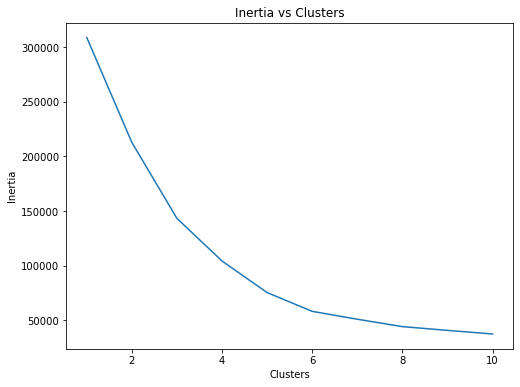

In [4]:
arr = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i).fit(processed_data)
    arr.append(kmeans.inertia_)
    
plt.figure(figsize=(8,6))
plt.xlabel("Clusters")
plt.ylabel("Inertia")
plt.title("Inertia vs Clusters")
plt.plot(range(1,11), arr);

This is known as the elbow graph, the x-axis being the number of clusters, the number of clusters is taken at the elbow joint point. This point is the point where making clusters is most relevant as here the value of WCSS suddenly stops decreasing. Here in the graph, after 5 the drop is minimal, so we take 5 to be the number of clusters.



In [33]:
# Finding labels of clusters
km = KMeans(n_clusters = 5)
km.fit(processed_data)
processed_data["label"] = km.labels_
processed_data

,Age,Annual Income (k$),Spending Score (1-100),Gender,label
0,19,15,39,1,4
1,21,15,81,1,2
2,20,16,6,0,4
3,23,16,77,0,2
4,31,17,40,0,4
...,...,...,...,...,...
195,35,120,79,0,0
196,45,126,28,0,3
197,32,126,74,1,0
198,32,137,18,1,3


In [34]:
# Splitting the data
arr1 = processed_data.iloc[:, :4]
arr2 = processed_data.iloc[:, -1]
data_train, data_test, label_train, label_test = train_test_split(arr1,arr2, test_size=0.25)
label_test

116    1
79     1
115    1
59     1
169    0
63     1
90     1
34     4
158    3
142    1
99     1
190    3
97     1
187    0
88     1
20     4
13     2
29     2
159    0
70     1
194    3
54     1
2      4
150    3
189    0
69     1
188    3
109    1
183    0
154    3
57     1
103    1
128    3
106    1
104    1
64     1
43     2
21     2
130    3
73     1
65     1
178    3
172    3
156    3
112    1
22     4
168    3
45     2
80     1
182    3
Name: label, dtype: int32

In [35]:
# Training
n_clusters = 5
model = KMeans(n_clusters=5)
model.fit(data_train)

KMeans(n_clusters=5)

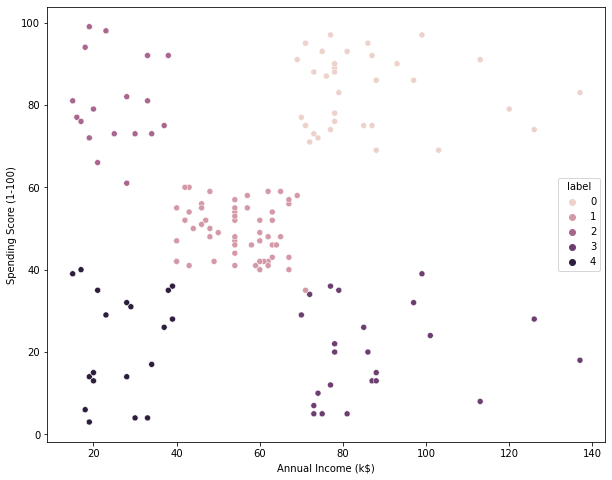

In [36]:
plt.figure(figsize=(10,8))
sns.color_palette("hls",8)
sns.scatterplot(x=data_train["Annual Income (k$)"], y=data_train["Spending Score (1-100)"],hue=label_train, legend="full");

In [37]:
# Prediction
predicted_clusters = model.predict(data_test)

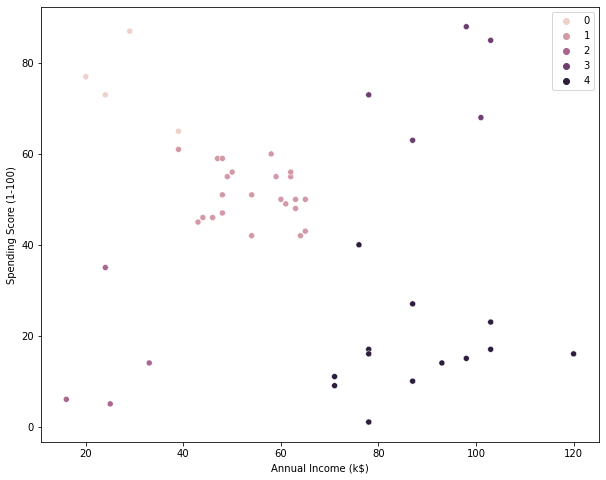

In [38]:
plt.figure(figsize=(10,8))
sns.color_palette("hls",8)
sns.scatterplot(x=data_test["Annual Income (k$)"], y=data_test["Spending Score (1-100)"],hue=predicted_clusters, legend="full");

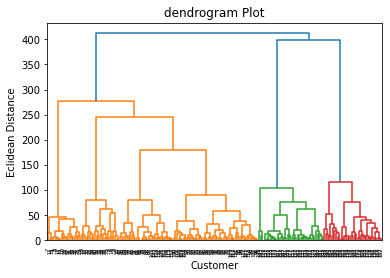

In [25]:
# Hierarchial clustering
import scipy.cluster.hierarchy as shc
dendrogram = shc.dendrogram(shc.linkage(processed_data,method="ward"))
plt.title("dendrogram Plot")
plt.xlabel("Customer")
plt.ylabel("Eclidean Distance")
plt.grid(False)

In [26]:
from sklearn.cluster import AgglomerativeClustering
agc = AgglomerativeClustering(n_clusters=5)
processed_data["label"] = agc.fit_predict(processed_data)
processed_data

,Age,Annual Income (k$),Spending Score (1-100),Gender,label
0,19,15,39,1,4
1,21,15,81,1,3
2,20,16,6,0,4
3,23,16,77,0,3
4,31,17,40,0,4
...,...,...,...,...,...
195,35,120,79,0,2
196,45,126,28,0,1
197,32,126,74,1,2
198,32,137,18,1,1


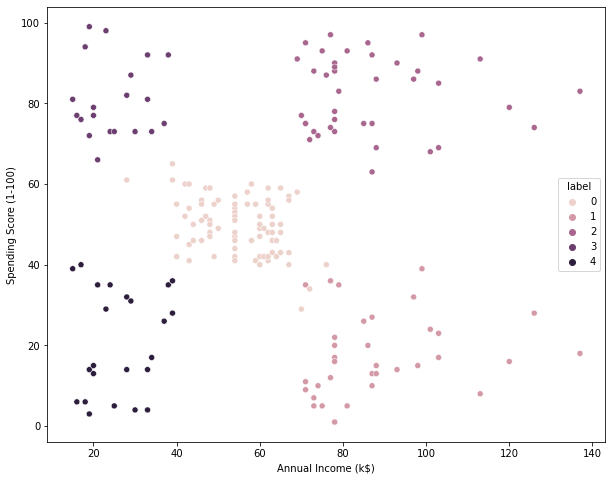

In [27]:
plt.figure(figsize=(10,8))
sns.color_palette("hls",8)
sns.scatterplot(x=processed_data["Annual Income (k$)"], y=processed_data["Spending Score (1-100)"],hue=processed_data["label"], legend="full");

In [40]:
# Evaluation

## Confusion Matrix
confusion_matrix(label_test, predicted_clusters)

array([[ 0,  0,  0,  5,  0],
       [ 0, 22,  0,  0,  1],
       [ 4,  1,  0,  0,  0],
       [ 0,  0,  0,  0, 13],
       [ 0,  0,  4,  0,  0]], dtype=int64)

In [41]:
from sklearn.metrics.cluster import adjusted_rand_score

acc_train_gmm = adjusted_rand_score(label_train,model.predict(data_train))
acc_test_gmm = adjusted_rand_score(label_test,predicted_clusters)

print("K mean : Accuracy on training Data: {:.3f}".format(acc_train_gmm))
print("K mean : Accuracy on test Data: {:.3f}".format(acc_test_gmm))

K mean : Accuracy on training Data: 1.000
K mean : Accuracy on test Data: 0.880


Conclusion
1. Accuracy of model is near about 88%
2. Used two clustering techniques - KMeans and Hierarchial